<p><a name="sections"></a></p>

# Hi, and welcome to this tutorial in Linear Regression! 

As I've experimented with various data sets for regression, I've coaleced some of my code into one Jupyter Notebook. The goal of sharing this notebook is to walk a new Data Science enthusiast through the 'Housing Prices' data set on Kaggle (https://www.kaggle.com/c/house-prices-advanced-regression-techniques). This is a great data set to experiment with various regression modeling techniques and tricks! I'd encourage each of you to register for Kaggle, submit scores to the various competitions and see how high on the leaderboard you can get. 

I've addressed a couple issues which gave me some trouble early on when I started running regression on data sets, including how to handle multi-collinearity among categorical variables (I leave some code chunks which you can pull and use in the future with minor adjustments). As always, please feel free to leave feedback and let me know what you did/did not like, or how I can continue to explain these concepts more concisely. 

Thank you and enjoy!


# Sections

- <a href="#eda">Exploratory Data Analysis</a><br>
    - <a href="#import">Import Data</a><br>
    - <a href="#convert">Convert Data Types</a><br>
    - <a href="#impute">Impute Missing Categorical Variables</a><br>
    - <a href="#distributions">View Distributions</a><br>
- <a href="#model1">Fitting Model 1</a><br>
    - <a href="#assumptions">Checking Model Assumptions</a><br>
- <a href="#multicollinearity">Multi-Collinearity</a><br>
    - <a href="#CorrelationMatrix">Correlation Matrix using Seaborn</a><br>
    - <a href="#spearman">Spearman Correlation</a><br>
    - <a href="#vif">Variance Inflation Factors</a><br>
    - <a href="#chi">Chi Square Test</a><br>
- <a href="#model2">Fitting Model 2</a><br>
    - <a href="#log">Log Transform (Feature Engineering)</a><br>
- <a href="#model3">Fitting Model 3</a><br>
    - <a href="#model3assumptions">Model 3 Assumptions</a><br>
- <a href="#submit">Submitting Models to Kaggle</a><br>


# Multiple Linear Regression

Today we are going to explore Multiple Linear Regression (MLR). MLR is probably one of the best know, but also the most useful machine learning algorithms which can be applied to a host of data sets. It does a good job of balance both the descriptive characteristics of the data set with predictive performance. 

I've found that the best way to gain an understanding of an algorithm is to implement it on a real data set. I've downloaded the 'Housing Prices: Advanced Regression Techniques' data set from Kaggle to analyze (https://www.kaggle.com/c/house-prices-advanced-regression-techniques) 

Let's get started!

In [59]:
#Import the necessary packages. We'll be using all of these, and more to come
import os
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
#Set the working directory to the appropriate folder 
#Check to make sure the necessary files are there
os.getcwd()
os.chdir('/Users/zescalan/Desktop/Housing Prices')
os.listdir()

['.ipynb_checkpoints',
 'data_description.txt',
 'Linear+Regression.ipynb',
 'model_1_predictions.csv',
 'model_2_predictions.csv',
 'model_3_predictions.csv',
 'plots',
 'sample_submission.csv',
 'test.csv',
 'train.csv']

<p><a name="import"></a></p>

#### Let's Import our Data Set

In [5]:
#Let's read our data set into a pandas dataframe
df = pd.read_csv('train.csv', index_col = 0)

# MLR Assumptions

#### In MLR, there are five main assumptions that we want to check prior to using our model to make predictions on a data set. 

1. Does the dependant variable exhibit a linear relationship with the independant variables?

2. Do the independant variables demonstrate multi-collinearity amongst themselves?

3. Are the residuals of the regression normally distributed?

4. Do the residuals have constant variance?

5. Are the residuals independant of each other?

As we walk through this tutorial we'll examine each of these assumptions, and arrive at the best possible fitting model!

<p><a name="eda"></a></p>
# Exploratory Data Analysis (EDA)

** Exploratory Data Analysis**

Now that the data is loaded, let's do some Exploratory Data Analysis (EDA) on our data set to see what kinds of variables we have,  and perhaps remove a few based on missingness, distribution, or multi-collinearity

In [7]:
#Let's take a look at the shape of the dataframe, the column names and the data types
print(df.shape, "\n")
print(df.columns, "\n")
print(df.dtypes)

(1460, 80) 

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'Pav

<p><a name="convert"></a></p>

**Convert data types 'object' **

In our dataset, we noticed several variables that are not numeric and are instead of **type 'object'**. For linear regression to work properly, we must change these from **objects to categorical variables**

In [8]:
#Convert the 'object' type variables to 'categorical' variables
objects = df.loc[:, df.dtypes == object].columns

for i in df.columns:
    if i in objects:
        df[i] = df[i].astype('category')

See that all the **'objects'** have changed to **'category'**

In [9]:
#Un-comment out the first line of code to see all the data types (I used the .head() for readability)
#df.dtypes
df.dtypes.head()

MSSubClass        int64
MSZoning       category
LotFrontage     float64
LotArea           int64
Street         category
dtype: object

#### Now, let's make a list of all the categorical variables for ease of use

Since we are running a regression, we'll need to use **'one-hot-encoding'**. This means that each categorical variable will be assigned an integer for each category in that specific column. **The integer-respresentation of the categorical variables have no numeric meaning, rather they will enable us to use these categories in our regression in the future.**  

In [10]:
mylist = list(df.select_dtypes(include=['category']).columns)
mylist

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

### Missingness

#### There are three types of missingness to be considered: 

**Missing Completely At Random (MCAR)**: This means that a value is missing due to random chance (an entry on a survey was smudged and was unable to be entered)

**Missing At Random (MAR)**: MAR-type missingness is when a variable is missing, but it's due to a relationship with another variable in the data set (i.e. a homeowners survey reveals that a large number of people failed to answer the survey - but this may be due to that subset of people working later than 6pm when the surveys were collected).

**Missing Not At Random (MNAR)**: This missingness is the most dangerous to encounter, and must be handled carefully. This occurs when a value is missing for an explicit reason - than missingness has meaning.

To examine the missingness for each variable in this data set is left as an exercise to the reader. For today we will assume that all missingness is MCAR (a very bad assumption, but it will enable us to move through the lesson). Please take a look and examine these variables yourself!

<p><a name="impute"></a></p>

**Assign Values to Missing Categorical Variables **

Since we are assigning integers for the categories in each column, the 'NA' values are assigned an integer, hence we won't need to impute missing values. With more time assigned to data understanding, we may decide that eliminating or mean/median-imputing would be a better method of handling missing values, but for today we'll leave missing categorical variables as their own  category and use them in our regression this way.

In [13]:
for i in mylist:
    S = set(df[i]) # collect unique label names
    D = dict( zip(S, range(len(S)))) # assign each string an integer, and put it in a dict
    Y = [D[j] for j in df[i]] # store class labels as ints
    df[i] = Y
    df[i] = df[i].astype('category')
#df.head()

In [14]:
#Let's make sure all the values we imputed with '0' are also 'categorical' data types. Once again, uncomment out the first line of 
#code in order to check all the variable data-types
#df.dtypes    #<-- Uncomment this
df.dtypes.head()

MSSubClass        int64
MSZoning       category
LotFrontage     float64
LotArea           int64
Street         category
dtype: object

In [20]:
#Determine the % missing in each column
df.isnull().sum()/len(df)

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.000000
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.000000
                   ...   
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
Fireplaces       0.000000
FireplaceQu      0.000000
GarageType  

<p><a name="distributions"></a></p>

**Let's Analyze the Distributions of Each Variable **

Before we decide what to do with these variables after examining the missingness in the data set, let's take a moment and examine the distributions of each of these variables. This may give us an inclination as to which ones we should keep, which we can perhaps discard, or whether we should try some sort of value imputation (mean, median, mode, etc)

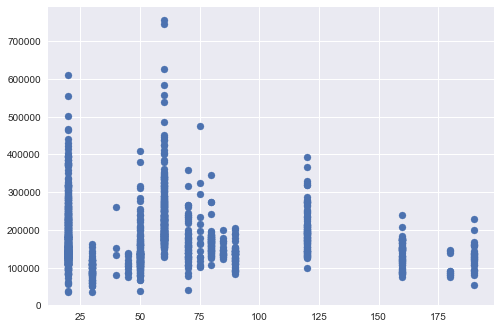

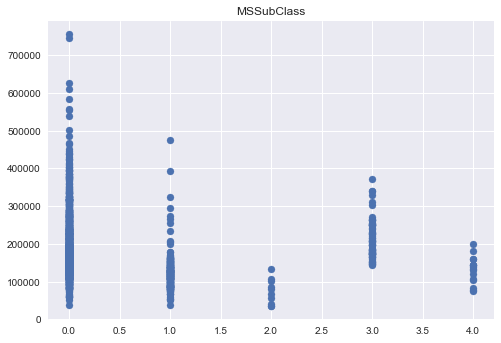

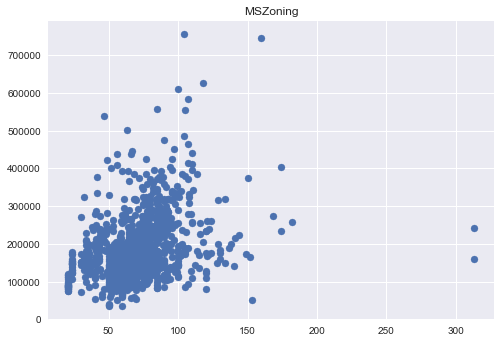

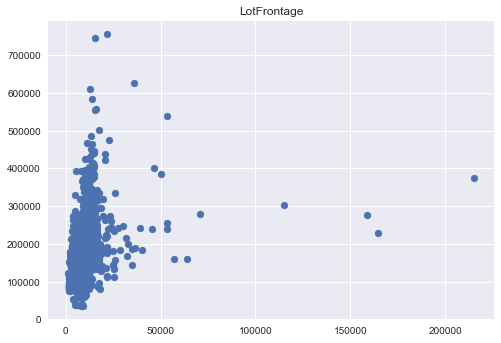

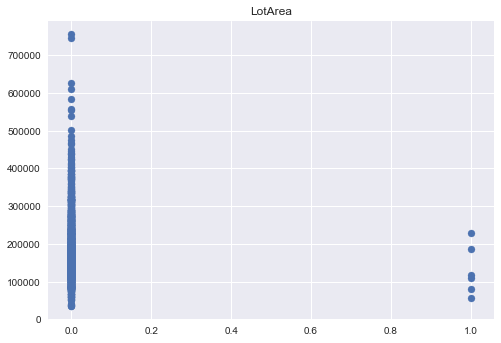

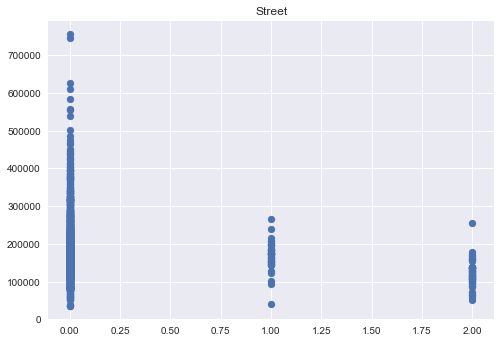

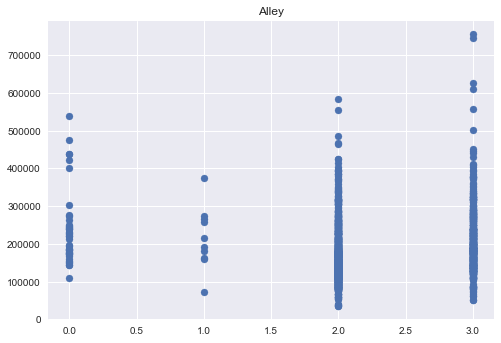

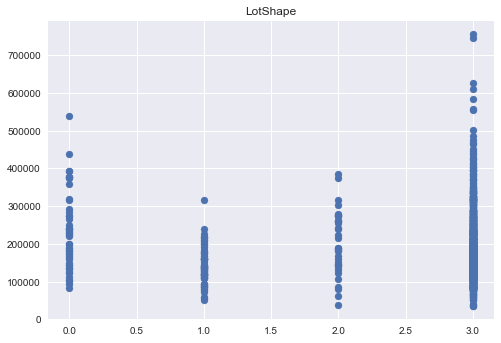

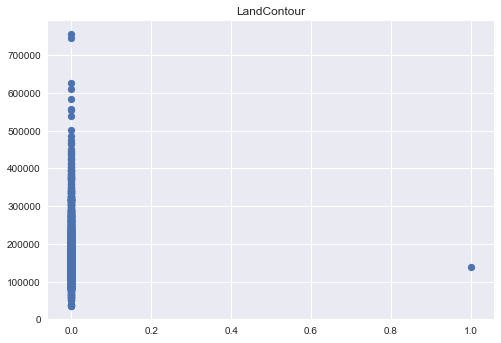

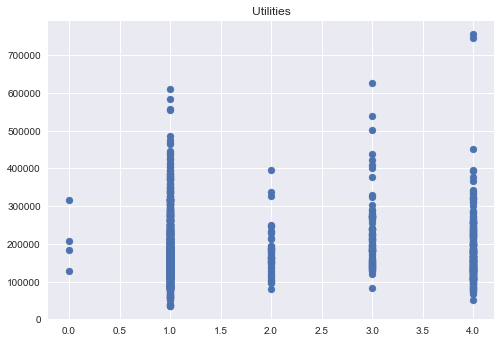

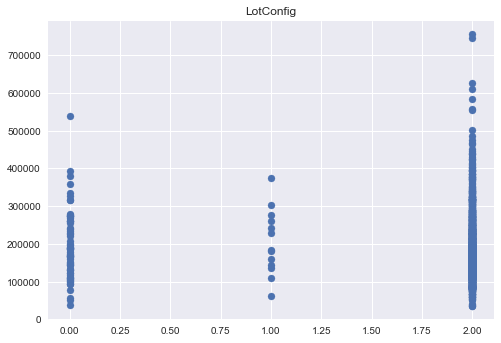

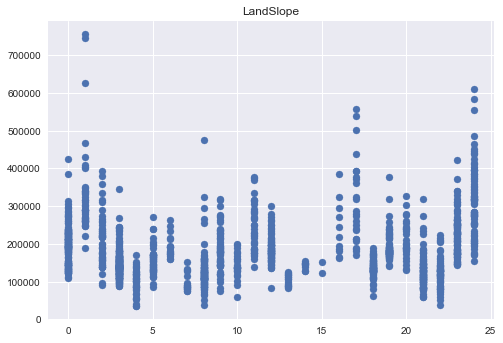

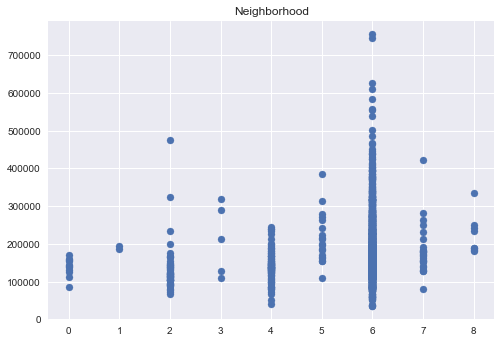

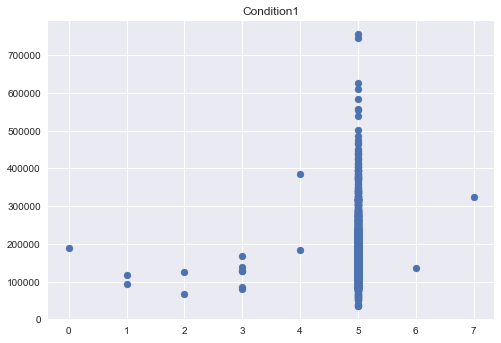

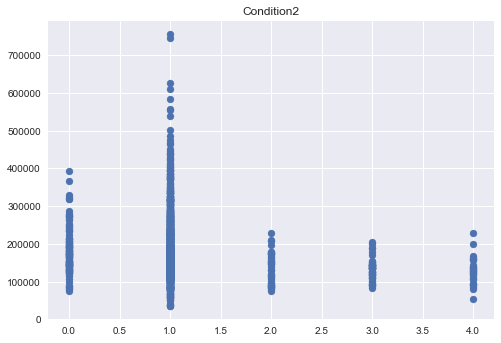

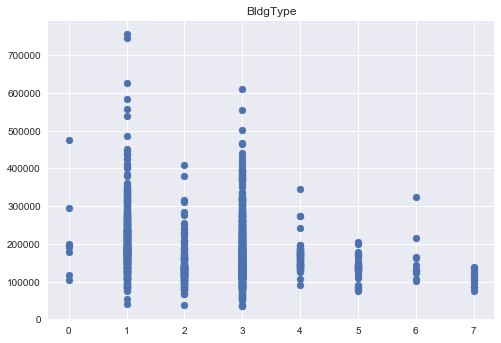

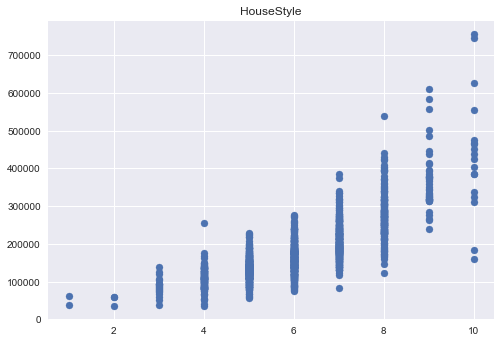

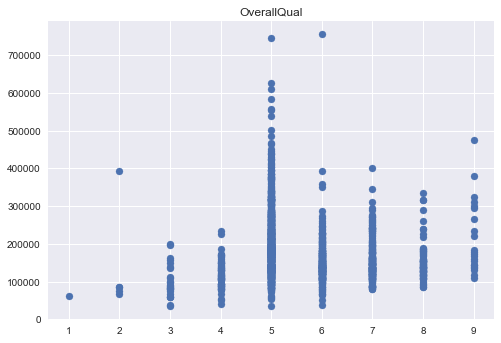

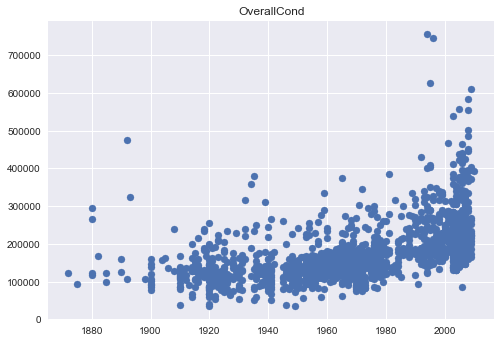

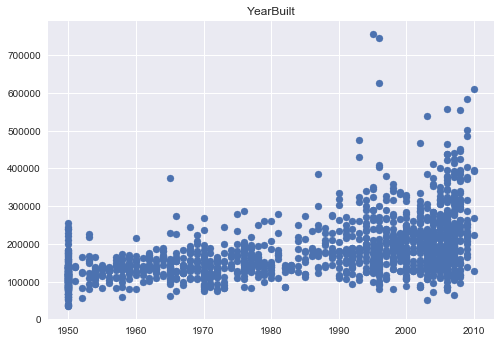

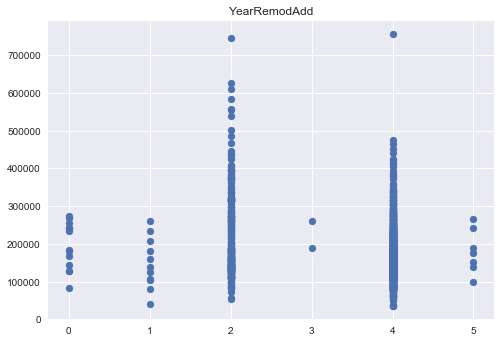

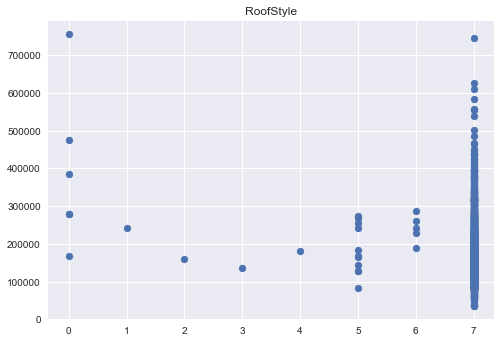

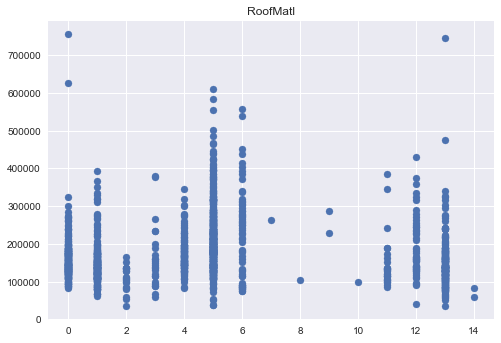

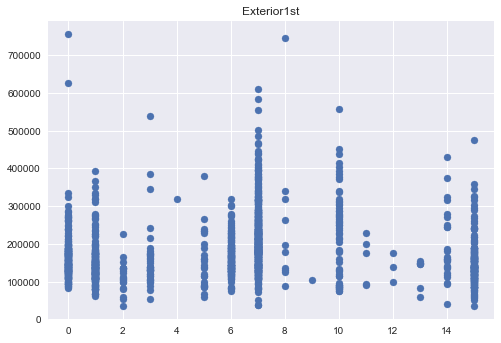

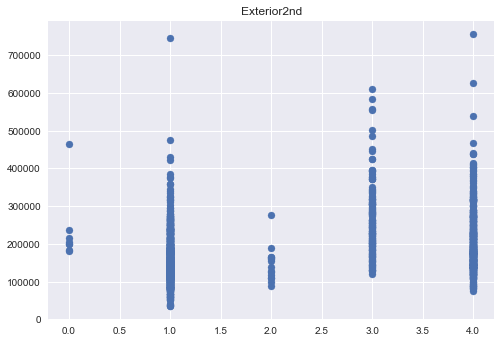

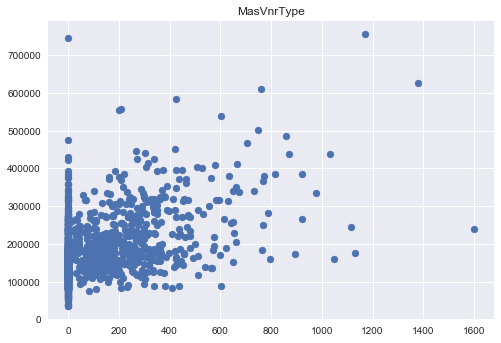

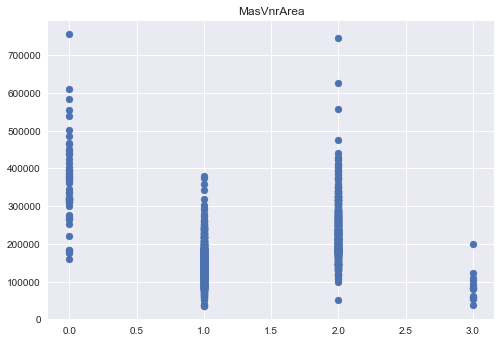

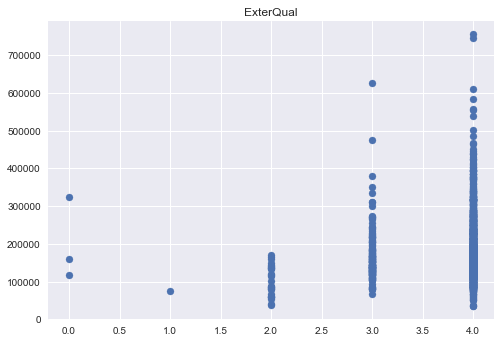

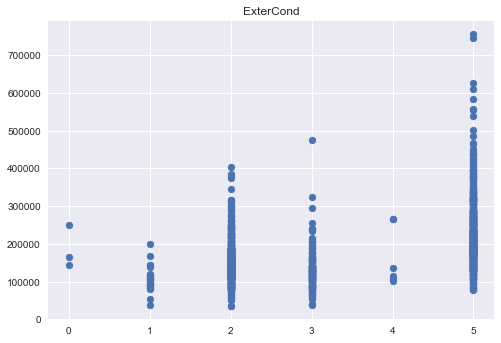

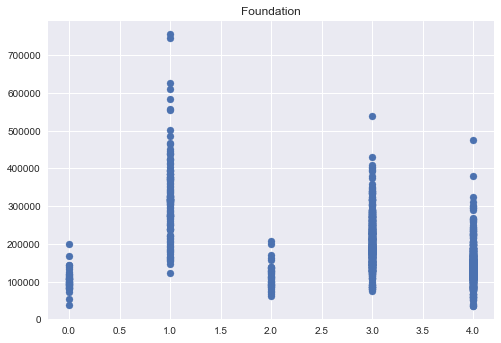

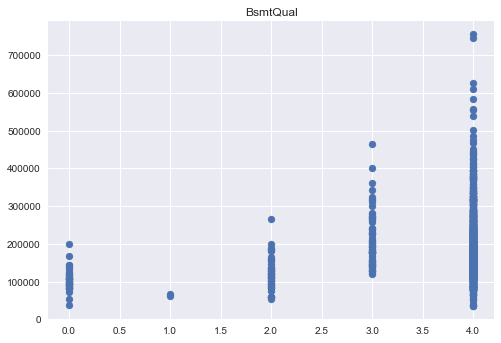

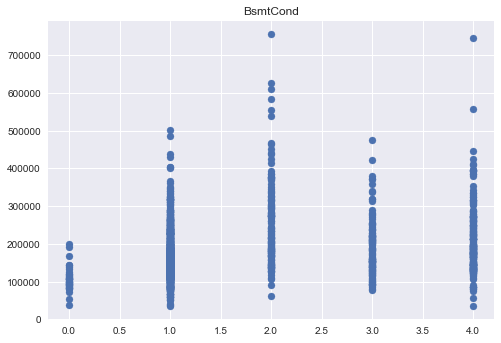

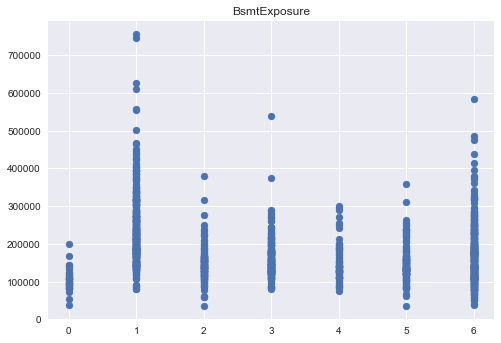

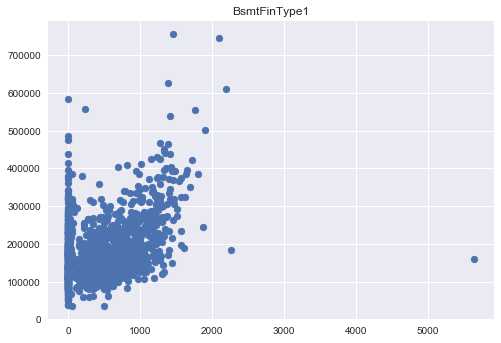

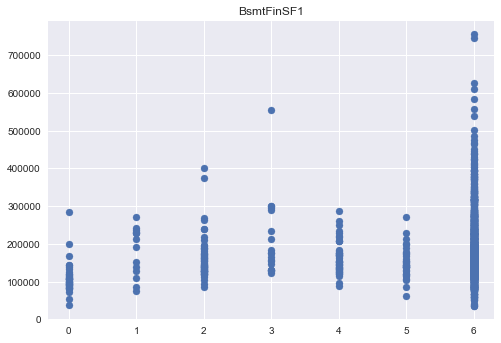

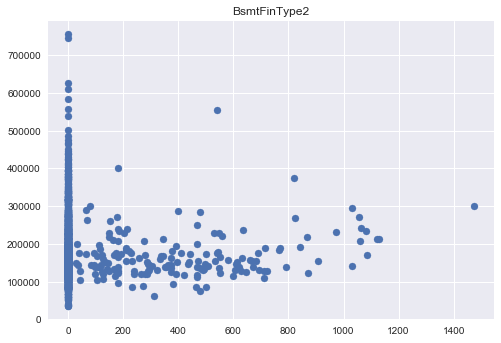

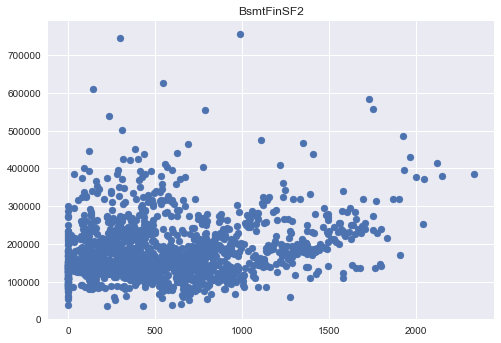

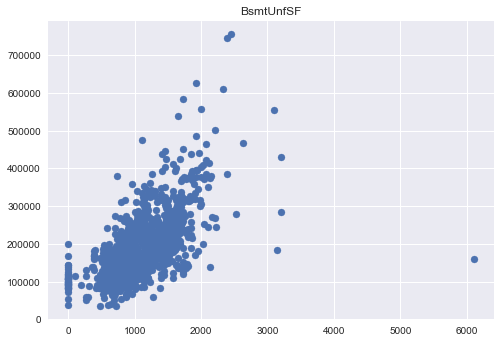

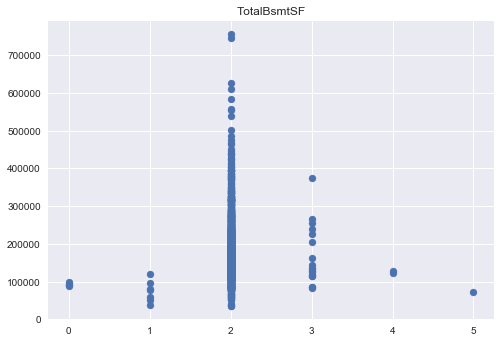

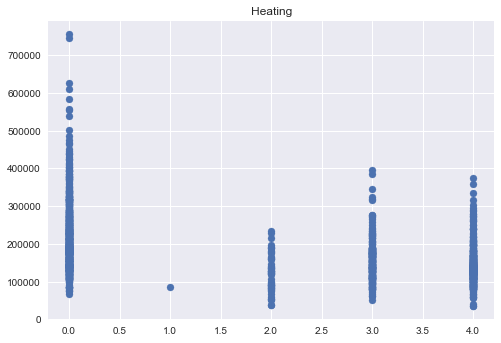

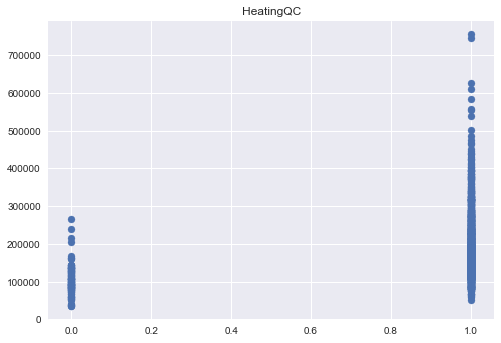

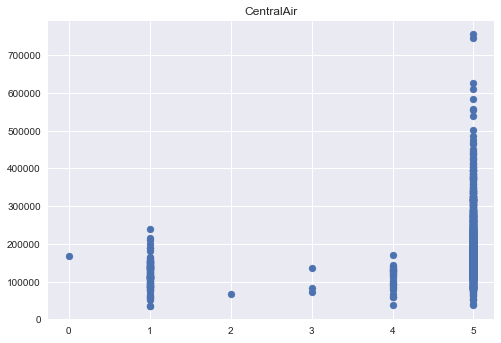

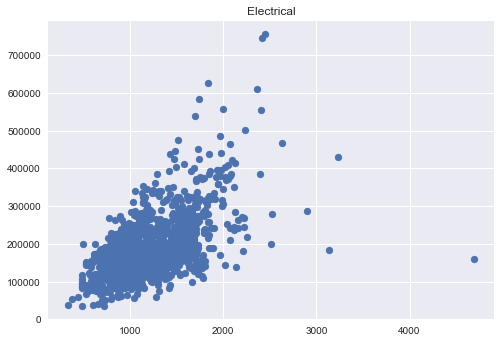

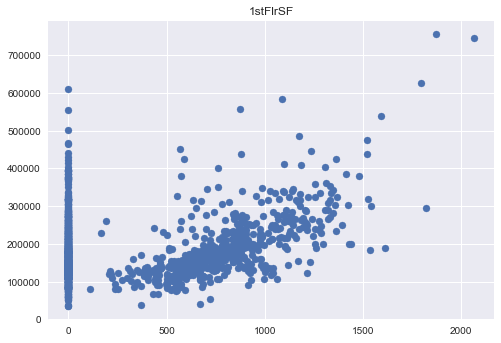

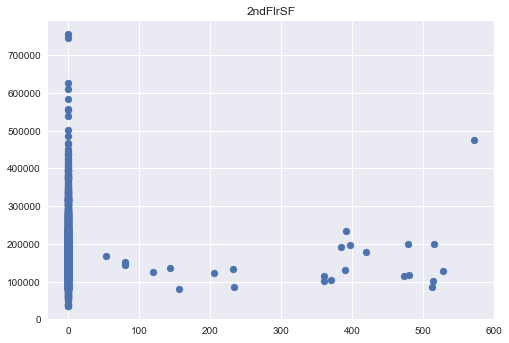

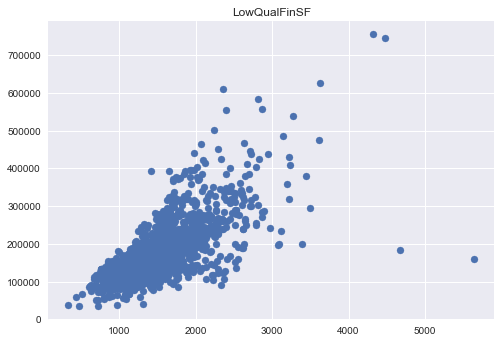

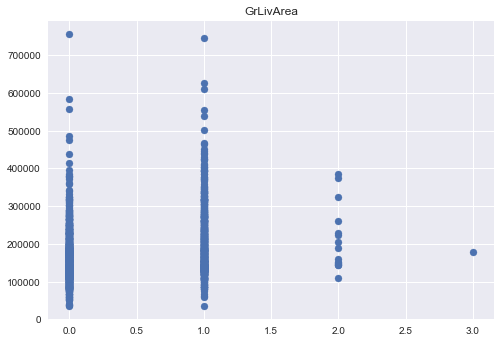

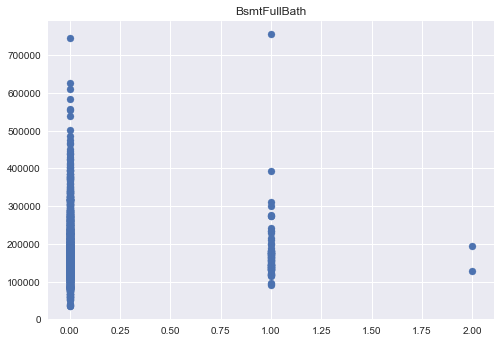

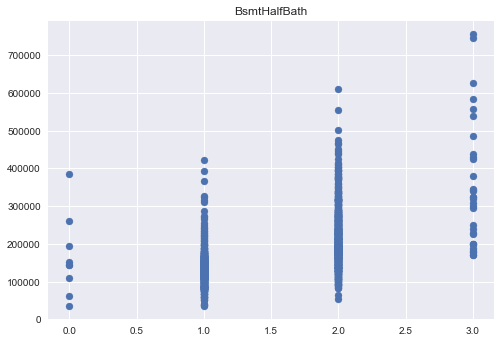

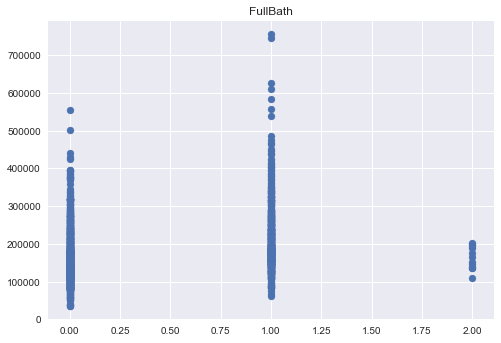

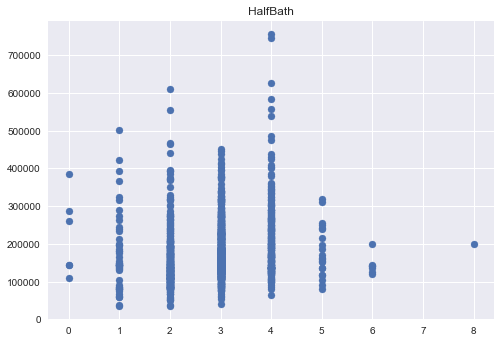

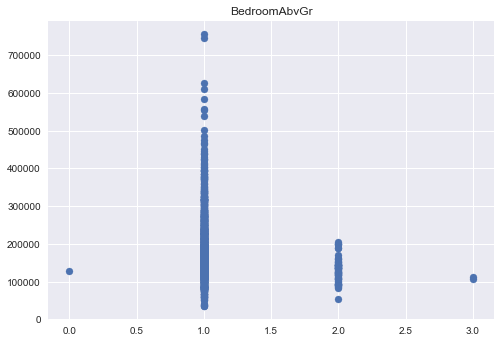

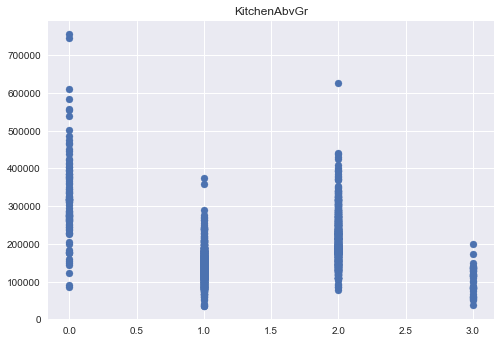

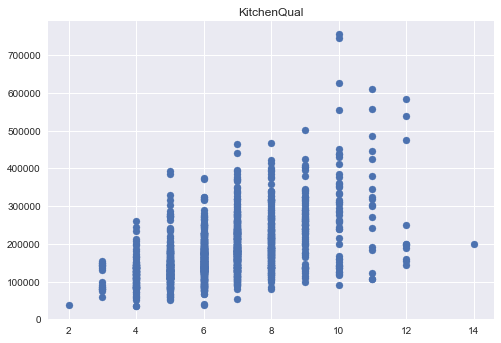

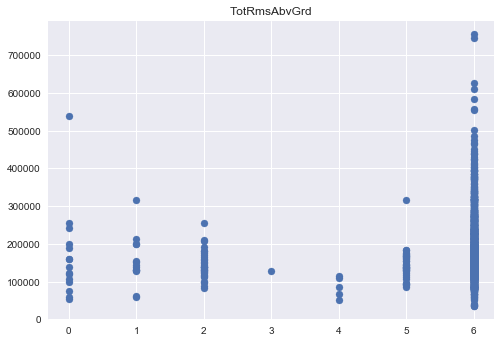

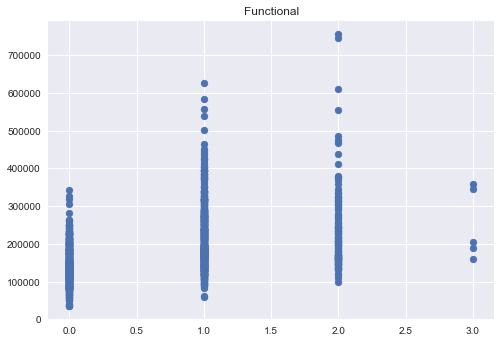

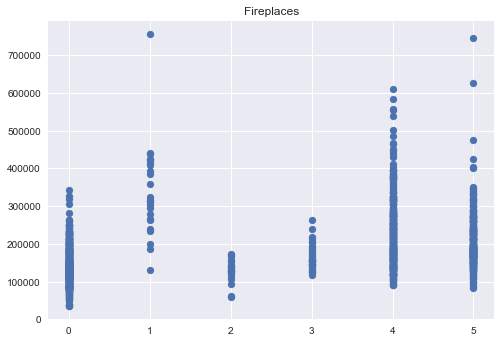

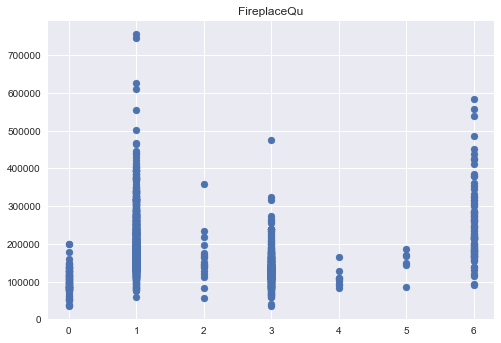

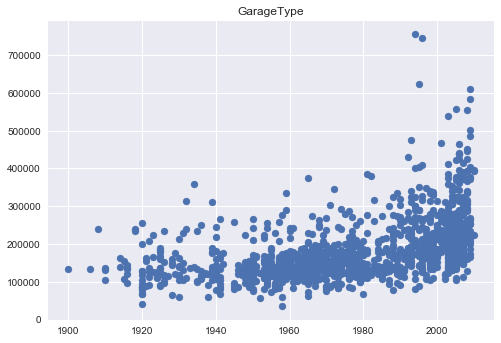

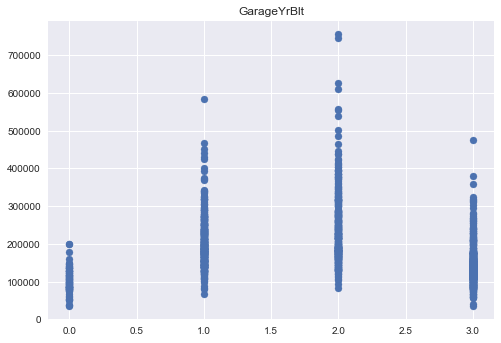

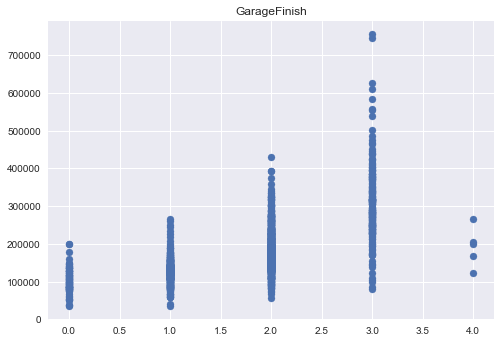

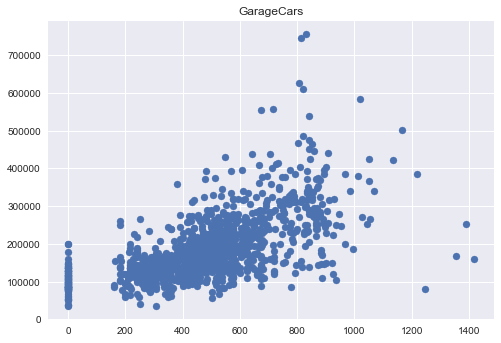

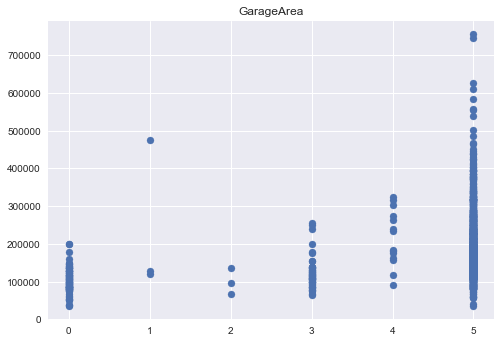

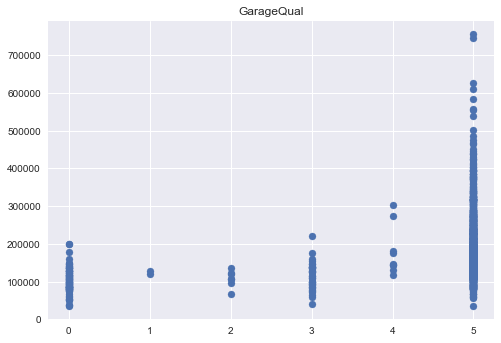

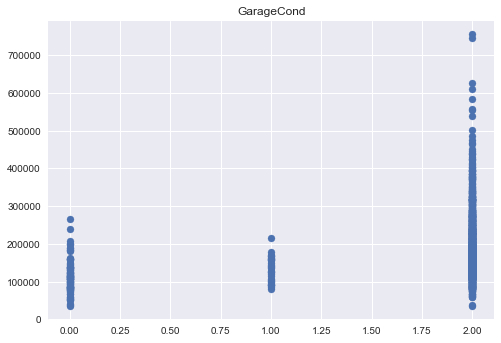

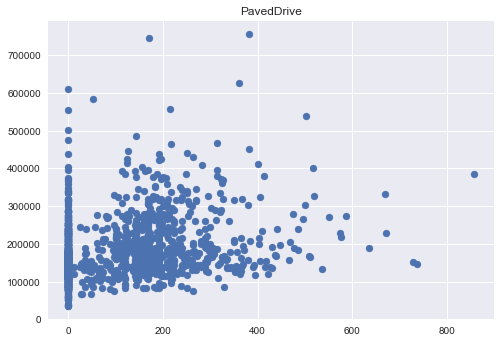

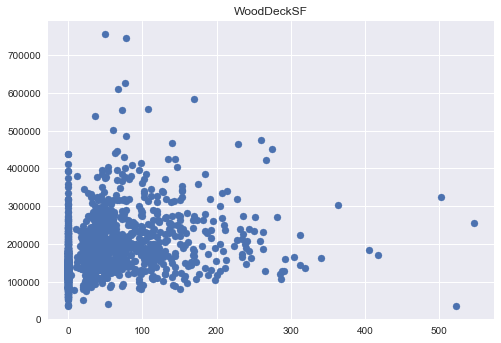

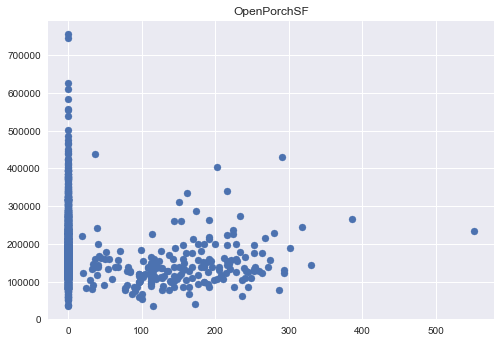

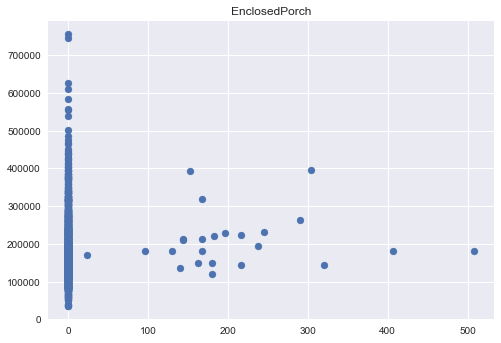

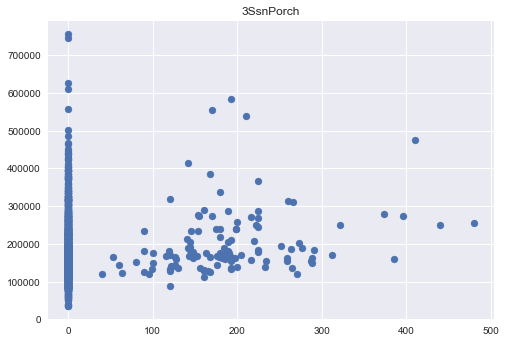

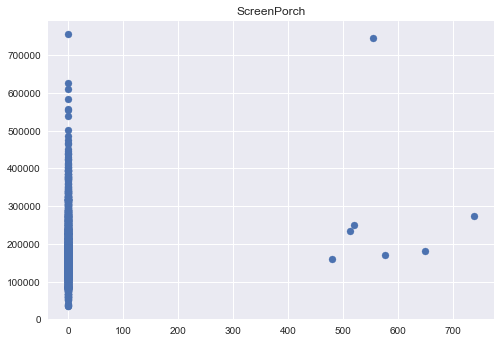

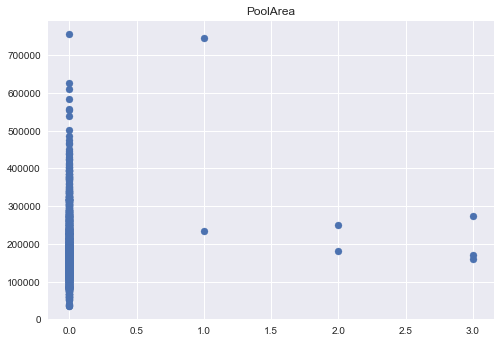

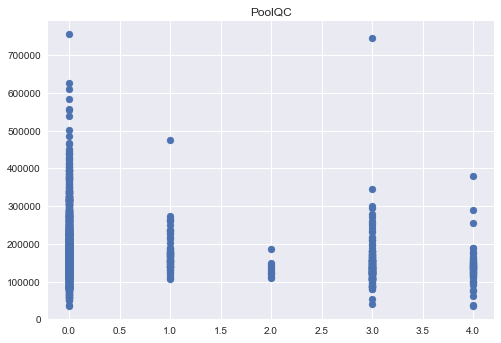

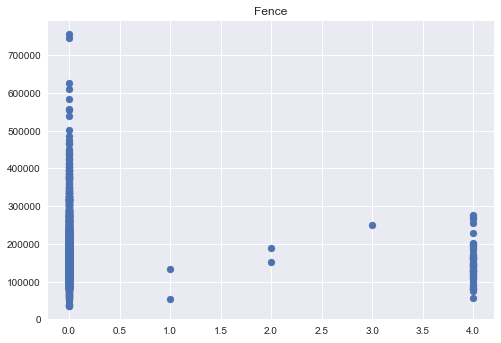

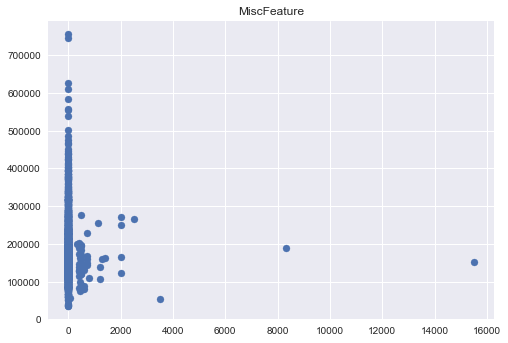

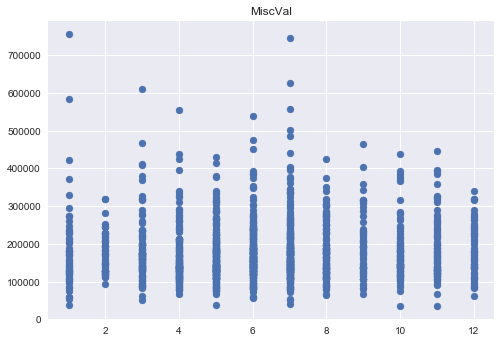

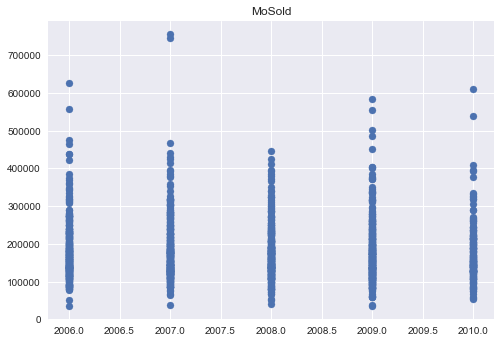

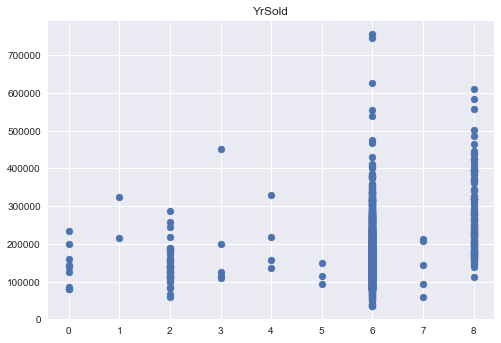

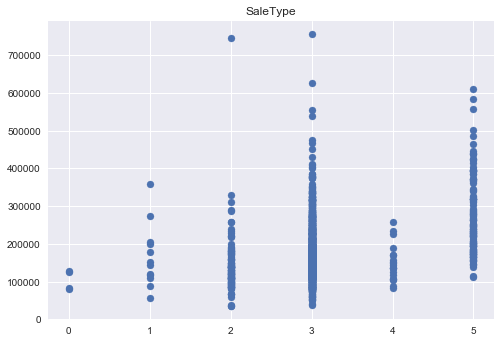

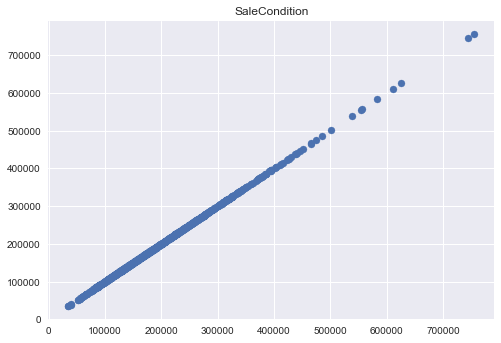

In [15]:
#Let's examine first examine each of the variables to see what the distribution looks like
for i in df.columns:
    plt.scatter(df[i], df['SalePrice'])
    plt.show()
    plt.title(i)

#### Let's now analyze which columns have more that 5% missingness and see what we should do with them. 

In [23]:
t = list(df.isnull().sum()/len(df)>0.05)
u = [i for i, x in enumerate(t) if x]
df.iloc[:, u].head(10)

,LotFrontage,GarageYrBlt
Id,,
1,65.0,2003.0
2,80.0,1976.0
3,68.0,2001.0
4,60.0,1998.0
5,84.0,2000.0
6,85.0,1993.0
7,75.0,2004.0
8,NaN,1973.0
9,51.0,1931.0


As we examine the two columns that have more than 5% missingness, it appears one variable is more important than the other. 'LotFrontage' tells us how much footage is in front of the house, whereas 'GarageYrBuilt' is going to be highly correlated with 'YearBuilt', which we already have in our data set. While there are many ways we could handle these missing values, we are going to drop them for now and rely on the 60+ variables still in our data set. **As you examine this data set, please experiment with different methods of imputing values to see if keeping these variables can boost the R^2 of your model**

In [24]:
df = df.drop(df.columns[u], axis=1)

In [25]:
#df.isnull().sum()
#I wrote this because the 'MasVnrArea' variable was not imputing correctly
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df.isnull().sum(0)

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
                ..
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC      

<p><a name="model1"></a></p>

# Fitting our First Model

** Model 1**

Now that we have dropped some missing data columns, we can finally create a **linear regression object** using both training and test data. We'll first split our data into training/tests sets, and use the **'sklearn'** package in Python.

Get a random 80% of the entire set

In [81]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [82]:
#Separate the dependant variable from the independant variables
x_train = train.loc[:, df.columns != 'SalePrice']
y_train = train['SalePrice']
#Separate the dependant variable from the independant variables
x_test = test.loc[:, df.columns != 'SalePrice']
y_test = test['SalePrice']

Create linear regression object from **'sklearn'**

In [83]:
regr_1 = linear_model.LinearRegression()

In [84]:
#Fit our regression using the training data
regr_1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
regr_1_pred = regr_1.predict(x_test)

In [86]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, regr_1_pred))

print("That's a lot of error!")

Mean squared error: 1901676478.56
That's a lot of error!


In [87]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, regr_1_pred))

Variance score: 0.70


<p><a name="assumptions"></a></p>
#### Let's analyze the assumptions we stated for MLR 

**1. Linearity**  
**2. Multi-collinearity**
**3. Constant Variance**  
**4. Normally distributed residuals**  
**5. Indepedent residuals**  

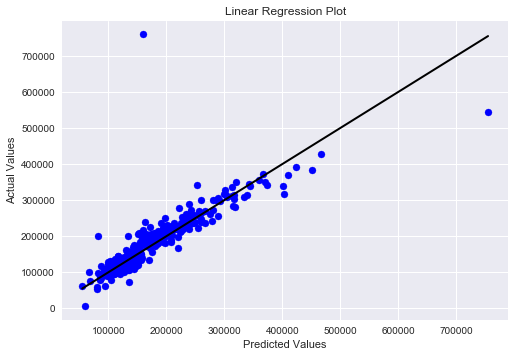

In [88]:
# Plot outputs
plt.scatter(y_test, regr_1_pred,  color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=2)
plt.title('Linear Regression Plot')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

plt.show()

#### That's not a terrible looking regression. We see that there's a general linear trend, probably good enough to proceed with our model testing process

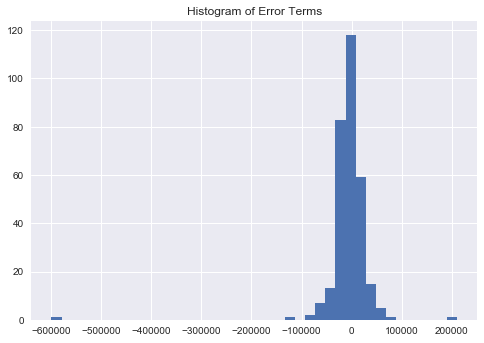

In [89]:
residuals = y_test - regr_1_pred
plt.hist(residuals, bins = 40)
plt.title('Histogram of Error Terms')
plt.show()

#### The error terms appear to be approximately normal in distribution

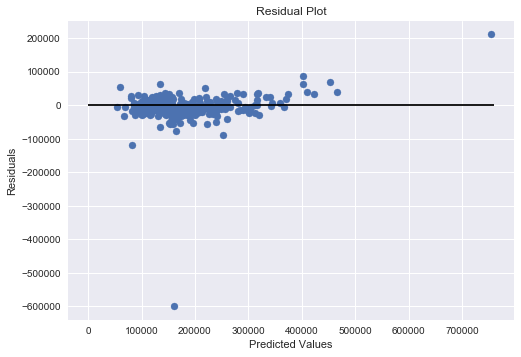

In [90]:
plt.scatter(y_test, y_test - regr_1_pred)
plt.hlines(y = 0, xmin = max(regr_1_pred), xmax = 0)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.show()

#### We also see that the error terms are relatively well spaced (a few outliers not withstanding).

This would help us to confirm assumptions **3) Constant Variance 4) Normally Distributted Residuals 5) Residuals are independent of each other**. In the future as we fit additional models, we'll run through each of these graphs. The only assumption we haven't verified is **multi-collinearity**, but we'll address that with the next model and demonstrate the decrease in **MSE** and increase in **R^2**

<p><a name="multicollinearity"></a></p>

### Assumption #2 - Multi-collinearity

We will now examine one of our assumptions to fitting an MLR model - no multi-collinearity among the independant variables (in reality I shoud say 'limitted multi-collinearity', so zero multi-collinearity rarely exists!).

One way we can begin to do this is my examing a correlation matrix of the independant variables

**This correlation matrix is found in the 'seaborn' package (we installed previously). This code was taken from 
http://seaborn.pydata.org/examples/many_pairwise_correlations.html and modified only slightly**

<p><a name="CorrelationMatrix"></a></p>

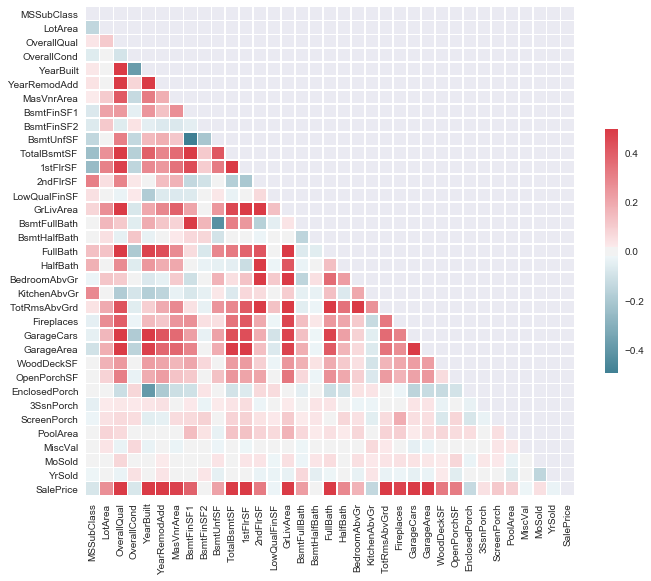

In [46]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show(sns)

This gives us a good idea of which variables are co-linear with each other, and would be good candidates to drop. The problem with this method however, is that it only computes the correlation among the ingteger/float valued variables. **So how do we compute the correlation between categorical variables?**

<p><a name="spearman"></a></p>

**At this time, I would like to leave the user with some code which will compute the Spearman correlation for a data set,** then delete the one of the variables which is co-linear with the others. This is not a preferred method for handling categorical variables, so we will not fit a model using this data set, but it can be useful with a large number of variables to quickly eliminate the most co-linear

P.S. The first variable encountered between two co-linear variables will be the one dropped. Your excellent knowledge of the data set will have to be what determines whether this was the correct variable to drop or not ;) 

In [47]:
from scipy.stats import spearmanr

corr_ = spearmanr(df)
#Create a dataframe out of the correlation matrix
corr_ = pd.DataFrame(corr_[0]).abs()

#Delete the bottom half of the matrix so that we don't delete both co-linear variables, but only one of them.
corr_spr = corr_.where(~np.tril(np.ones(corr_.shape)).astype(np.bool))

#Let's create one list of co-linear variables. This list will be used to drop columns in our dataframe.
values = []
for i in corr_spr.index.values:
        #Add all variables to the list that are in excess of 30% colinear
        values.append(corr_spr.index[corr_spr[i] > 0.30].tolist())
#colinear variables added to the 'filtered_values' list
filtered_values = [j for i in values for j in i]
filtered_values = list(set(filtered_values)) #eliminate all duplicates by calling 'set'

#Drop the co-linear columns
df_filtered = df.drop(df.columns[filtered_values], axis=1)

In [48]:
#These are the columns we dropped for being highly co-linear
print(df.columns[filtered_values])
#These are the columns remaining after removing the co-linear ones
print(df_filtered.columns)

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LandContour', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'MiscFeature',
       'SaleType'],
      dtype='object')
Index(['Street', 'Alley', 'LotShape', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl',
       'Exterior2nd', 'ExterCond', 'BsmtCond', 'BsmtFinSF2', 'Heating',
       'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
 

<p><a name="vif"></a></p>
#### A more analytical method of detecting colinearity is by examining the Variance Inflation Factors for integer variables 

Variance Inflation Factors (VIF) are calculated by regressing each independant variables against the other independant variables and determining their co-efficient of determination (R^2) to calculate the VIF (1/1-R^2). If they have a very high VIF, then that variables is highly co-linear to the other variables and should probably be eliminated.

#### Split the data set by the variable types

In [49]:
integer_cols = df.dtypes[df.dtypes == 'int64']
float_cols = df.dtypes[df.dtypes == 'float64']
category_cols = df.dtypes[df.dtypes == 'category']
df_ints = df[integer_cols.index]
df_floats = df[float_cols.index]
df_categories = df[category_cols.index]

#### Determine the VIF for integers

Variance Inflation Factors serve as an independant variables regression against the rest of the remaining independant variables in the data set

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(df_ints.as_matrix(), i) for i in range(df_ints.shape[1])]

C:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [51]:
#Create a list of all the variables with VIF > 5 (this is a commonly accepted cutoff)
t = [i for i, x in enumerate(np.array(vif)<5) if x]
df_int_reduced = df_ints[df_ints.columns[t]]
integer_variables = list(df_int_reduced.columns)

<p><a name="chi"></a></p>
#### Now we handle the independance of the categorical variables using chi-squared tests

The Chi-Square test is the best method of determining whether two categorical variables are independant of each other. In the following lines of code I will declare a function that computes the Chi-square test for two columns in a dataframe, and then apply that function to each column of our data set vs every other column to get a complete list of independance amongst our categorical variables. If you should choose to use this code, be careful! It could take a long time to run since the fastest I could implement this was in n-runtime!

In [52]:
import scipy.stats as stats

#### Here I define a function that creates a chi-squre test for two numpy arrays

In [53]:
def chi_square_test(a, b):
    c = np.column_stack((a, b))
    observations = c
    row_sums = c.sum(axis = 1)[:, None]
    d = np.append(c, row_sums, axis=1)
    col_sums = d.sum(axis=0)[None,:]
    e = np.append(d, col_sums, axis=0)
    
    expected = np.outer(row_sums, col_sums[0][:len(col_sums[0])-1])/col_sums[0][len(col_sums[0])-1]
    #to avoid dividing by zero, I'm substituting 0.01 for 0 
    expected[expected == 0] = 0.01
    
    chi_squared_stat = (((observations-expected)**2)/expected).sum()
    
    crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = c.shape[0]-1*c.shape[1]-1)   # Df = number of variable categories - 1
    
    p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=c.shape[0]-1*c.shape[1]-1)
    return(chi_squared_stat, crit, p_value)

#### Now, let's loop through the df_categories dataframe and calculate the test of independance for each variable vs every other variable in the dataframe and store those results in a dictionary

In [54]:
dict_ = {}
for i in range(0, len(df_categories.columns)-1):
    dict_[df_categories.columns[i]] = {}
    for j in range(i+1, len(df_categories.columns)):
        t = chi_square_test(df_categories.iloc[:,i], df_categories.iloc[:,j])
        dict_[df_categories.columns[i]][df_categories.columns[j]] = {'Chi_Sq': t[0], 'T-Stat': t[1], 'P-Value': t[2]}
dict_

{'Alley': {'BldgType': {'Chi_Sq': 1031.4681088066682,
   'P-Value': 1.0,
   'T-Stat': 1546.9140368552858},
  'BsmtCond': {'Chi_Sq': 1752.3628305023099,
   'P-Value': 1.2861562481703004e-07,
   'T-Stat': 1546.9140368552858},
  'BsmtExposure': {'Chi_Sq': 1492.9195314569583,
   'P-Value': 0.25068391916112742,
   'T-Stat': 1546.9140368552858},
  'BsmtFinType1': {'Chi_Sq': 1455.9125666868213,
   'P-Value': 0.50311111435329448,
   'T-Stat': 1546.9140368552858},
  'BsmtFinType2': {'Chi_Sq': 1791.4344312521112,
   'P-Value': 3.5551418475776586e-09,
   'T-Stat': 1546.9140368552858},
  'BsmtQual': {'Chi_Sq': 1501.9410987177193,
   'P-Value': 0.20145426320382498,
   'T-Stat': 1546.9140368552858},
  'CentralAir': {'Chi_Sq': 1034.1300646870859,
   'P-Value': 1.0,
   'T-Stat': 1546.9140368552858},
  'Condition1': {'Chi_Sq': 2098.7720346458059,
   'P-Value': 0.0,
   'T-Stat': 1546.9140368552858},
  'Condition2': {'Chi_Sq': 1753.2610958461839,
   'P-Value': 1.1888819229088909e-07,
   'T-Stat': 1546.91

#### We can now create a dataframe out of the dictionary so that we can easily filter our results

In [55]:
var_1 = []
var_2 = []
chi_sq = []
t_stat = []
p_value = []
for i in dict_.keys():
    for j in dict_[i].keys():
        var_1.append(i)
        var_2.append(j)
        chi_sq.append(dict_[i][j]['Chi_Sq'])
        t_stat.append(dict_[i][j]['T-Stat'])
        p_value.append(dict_[i][j]['P-Value'])
chi_dict = {'Var_1': var_1, 'Var_2': var_2, 'Chi_Sq': chi_sq, 'T_Stat': t_stat, 'P-Value': p_value}
chi_df = pd.DataFrame(chi_dict)

#### Determine a subset of categorical variables to use in our regression

If the Chi_Sq value is significantly higher than the corresponding T_Stat (I say 'significantly, because once again-real life doesn't always obey our preferences!) the eliminate that variable. Also, if the p-value is greater than 0.05 (Another rule I've had to violate in order to keep some variables), then that test is statistically insignificant and the variable should not be considered independant.

In [56]:
#I have a large number of categorical variables, most of them correlated. To find a few indepedant ones, I randomly pick a place in the 
#data frame and calculate independance relative to that variables. You can easily adjust this code to start at the same place each time
from random import randint

variables = list(set(chi_df['Var_1']))
i = randint(0, len(variables)-1)
cat_df = chi_df[(chi_df['Var_1'] == variables[i]) & (chi_df['P-Value']<0.99)]
categorical_vars = list(cat_df['Var_2'])
categorical_vars

['MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

#### Combine Categorical and Integer variables

In [57]:
reduced_variables = categorical_vars + integer_variables
reduced_variables

['MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass',
 'LotArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

<p><a name="model2"></a></p>

# Fitting our Second Model

** Model 2**

Now that we have dropped some colinear data columns, we can finally create a **linear regression object** using our reduced data frame

#### Now we can creat a model based on the reduced data set

In [94]:
df_reduced = df[reduced_variables]

<p><a name="log"></a></p>

#### Log Transform

We need to consider data transformations. One of the most common is the log-transform. In the code listed below, we'll **iterate through our variables and where applicable we'll perform a log transform**

In [95]:
#The parameters for subplot are: number of rows, number of columns, and which subplot you're currently on. 
#So 1, 2, 1 means "a 1-row, 2-column figure: go to the first subplot." Then 1, 2, 2 means "a 1-row, 
#2-column figure: go to the second subplot.
import matplotlib.pyplot as plt

for i in df_reduced.columns:
    try:
        x = df_reduced[i]
        y = np.log(df_reduced[i])
        plt.subplot(1, 2, 1)
        plt.scatter(x, salePrice)
        plt.title(i)
        plt.subplot(1, 2, 2)
        plt.scatter(y, salePrice)
        plt.title(i)
        plt.show()
    except:
        pass

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [96]:
#Now let's apply the log transform to the following columns:
log_transform = ['LotArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
for i in log_transform:
    df_reduced[i] = np.log(df_reduced[i])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


#### Now re-train our model based on the reduced and transformed data set

In [97]:
#Some negative/undefined values have resulted in '-inf' values in our data set. In order to fix this, we'll impute 0-values 
#for these values.
values = ['MSSubClass', 'LotArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
for i in values:
    df_reduced[i][df_reduced[i]<0] = 0
    
df_reduced

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,...,BsmtHalfBath,HalfBath,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
Id,,,,,,,,,,,,,,,,,,,,,
1,4,2,4,5,3,4,1,1,6,2,...,0,1,0,0.000000,4.110874,0.000000,0.000000,0.000000,0.0,0.000000
2,1,1,4,2,3,4,2,3,6,2,...,1,0,1,5.697093,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,4,2,4,5,3,4,3,1,6,2,...,0,1,1,0.000000,3.737670,0.000000,0.000000,0.000000,0.0,0.000000
4,1,1,4,3,4,3,1,3,6,2,...,0,0,1,0.000000,3.555348,5.605802,0.000000,0.000000,0.0,0.000000
5,4,2,4,5,3,4,4,1,6,2,...,0,1,1,5.257495,4.430817,0.000000,0.000000,0.000000,0.0,0.000000
6,1,1,4,0,3,4,1,1,6,2,...,0,1,0,3.688879,3.401197,0.000000,5.768321,0.000000,0.0,6.551080
7,3,2,4,5,1,4,4,1,6,2,...,0,0,1,5.541264,4.043051,0.000000,0.000000,0.000000,0.0,0.000000
8,3,1,4,2,3,4,3,3,5,2,...,0,1,2,5.459586,5.318120,5.429346,0.000000,0.000000,0.0,5.857933
9,1,1,4,3,4,4,1,6,6,2,...,0,0,2,4.499810,0.000000,5.323010,0.000000,0.000000,0.0,0.000000


#### Create another linear regression object

In [98]:
#We create two dataframes - one we will use for the sklearn models, and this one here which we can use for our 'statsmodel'
#package built regression - soon to follow!
msk = np.random.rand(len(df)) < 0.8
df_reduced['SalePrice'] = df['SalePrice']
train = df_reduced[msk]
test = df_reduced[~msk]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [99]:
#Separate the dependant variable from the independant variables
x_train = train.loc[:, df_reduced.columns != 'SalePrice']
y_train = train['SalePrice']
#Separate the dependant variable from the independant variables
x_test = test.loc[:, df_reduced.columns != 'SalePrice']
y_test = test['SalePrice']

In [100]:
regr_2 = linear_model.LinearRegression()
regr_2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
# Make predictions using the testing set
regr_2_pred = regr_2.predict(x_test)

In [102]:
# The coefficients
print('Coefficients: \n', regr_2.coef_)

Coefficients: 
 [  6.48002713e+03   2.79414045e+03  -3.13712598e+03   8.98618710e+03
  -2.20074797e+04   1.48329918e+04   1.75982658e+03  -3.98048708e+03
   2.29178037e+03   2.06180094e+04  -3.56383269e+03   3.50001280e+03
   1.36350228e+03  -9.82858785e+03  -1.29856282e+03  -2.29188251e+03
   1.75194476e+03  -3.12465229e+03   2.83962893e+03  -2.07451660e+02
   3.72616858e+03  -2.41276917e+03  -1.74093459e+03   3.78329793e+03
  -7.52157163e+02   1.29486917e+04  -1.58192140e+01   3.89528852e+04
   3.32229209e+03   1.20738346e+03   1.74460403e+04   2.92780772e+04
   2.10585393e+03   3.14450481e+03   1.31000335e+03  -1.40777343e+03
   2.28817531e+03   3.50719196e+03  -4.89997269e+03]


In [103]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, regr_2_pred))

Mean squared error: 3081116011.62


In [104]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, regr_2_pred))

Variance score: 0.56


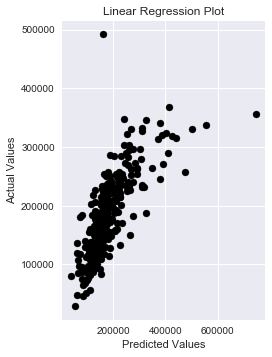

In [105]:
# Plot outputs
plt.scatter(y_test, regr_2_pred,  color='black')
plt.title('Linear Regression Plot')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

plt.show()

#### Now we need to check the last three assumptions of our regression (normal distribution, constant variance and independance of the residuals of the regression

We'll check these by examining the residual plot:

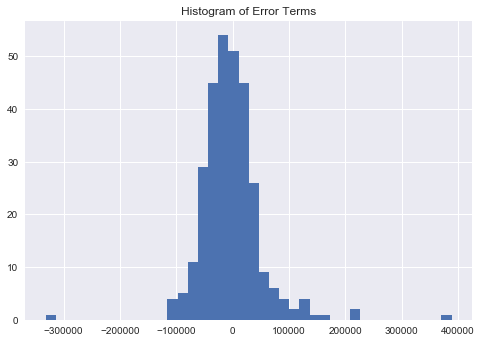

In [106]:
residuals = y_test - regr_2_pred
plt.hist(residuals, bins = 40)
plt.title('Histogram of Error Terms')
plt.show()

#### This is actually a pretty decent histogram of residual error terms. We have some extreme values, but outside of a couple of these points, we have a fairly normal distribution

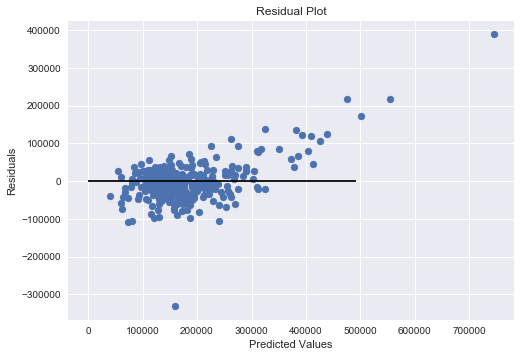

In [107]:
plt.scatter(y_test, y_test - regr_2_pred)
plt.hlines(y = 0, xmin = max(regr_2_pred), xmax = 0)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.show()

Once again, as we examine the residual plot we see that there is a handful of points which our model is not fitting. This would make me go back and examine my independant variables to see what data points I'm not modelling correctly.

<p><a name="model3"></a></p>

# Fitting Model 3

** Model 3**

One of the drawbacks of Python Sklearn for regression is that it takes a fair amount of matrix operations in order to deduce the relevant p-values. However, Python now has the **'Statsmodel'** package which is Python implementation of the R-coding language regression package. In addition to a more readable format, it also has readily available plots for analzying the model (such as Cook's Distance plots).

We'll now use that package to fit a model.

In [108]:
train.columns

Index(['MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition', 'MSSubClass', 'LotArea', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

In [109]:
import statsmodels.formula.api as smf

regr_3 = smf.ols(formula='SalePrice ~ GarageFinish+ GarageQual+ \
                    PavedDrive+ Fence+ \
                    LotArea+ BsmtFullBath+ \
                    HalfBath+ Fireplaces+ WoodDeckSF+ OpenPorchSF+ \
                    ScreenPorch+ PoolArea+ MiscVal', data=train).fit()

In [110]:
print(regr_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     62.93
Date:                Mon, 16 Oct 2017   Prob (F-statistic):          7.08e-179
Time:                        22:28:10   Log-Likelihood:                -14241.
No. Observations:                1159   AIC:                         2.853e+04
Df Residuals:                    1136   BIC:                         2.865e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.325e+05   2.99e+0

<p><a name="model3assumptions"></a></p>
#### Model 3 Graphs (Check Assumptions)

In [115]:
predictions = regr_3.predict(test)

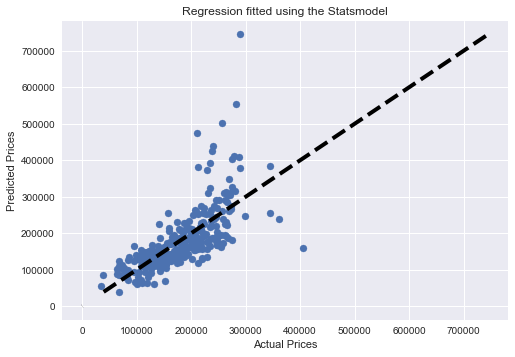

In [116]:
plt.scatter(predictions, test['SalePrice'])
plt.plot([test.min(), test.max()], [test.min(), test.max()], 'k--', lw=4)
plt.title('Regression fitted using the Statsmodel')
plt.ylabel('Predicted Prices')
plt.xlabel('Actual Prices')
plt.show()

#### Now let's take a look at the error terms to check their distribution 

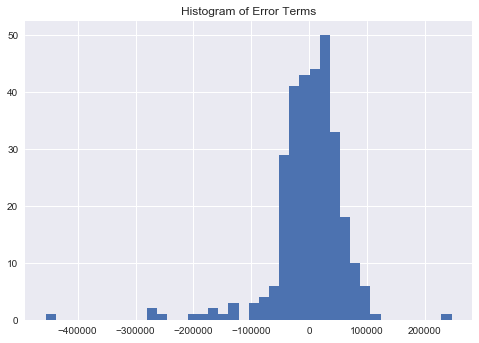

In [117]:
residuals = predictions - test['SalePrice']
plt.hist(residuals, bins = 40)
plt.title('Histogram of Error Terms')
plt.show()

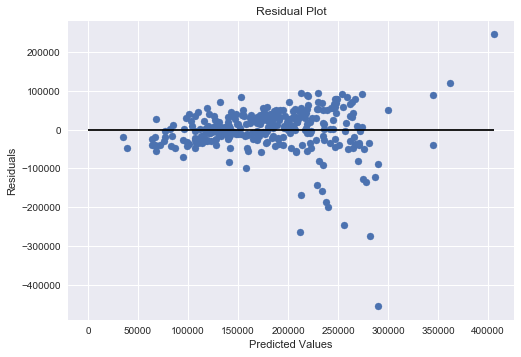

In [118]:
plt.scatter(predictions, predictions - test['SalePrice'])
plt.hlines(y = 0, xmin = max(predictions), xmax = 0)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.show()

There are certain graph functionalities that come with the **'statsmodel'** package. One of these is the Cook's Distance graph which measures the likelihood of a point being an **Influence Point**. We see here as we run the Cook's Distance graph that it highlights some points as being very likely candidates for being Influence Points (consistent with what we've seen in our graphs).

In [119]:
influence = regr_3.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

C:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<Container object of 3 artists>

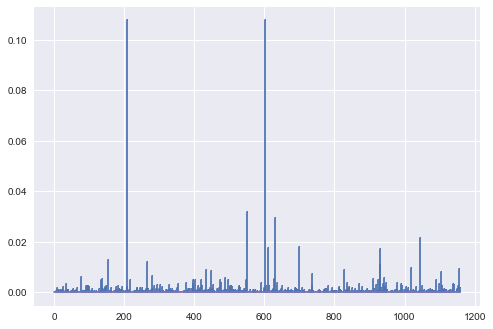

In [120]:
plt.show()

### Finish checking model assumptions

#### 3. The residuals look fairly normaly distributed
#### 4. The variance of the residuals around the regression line looks close to constant
#### 5. Both 3 & 4 would lead us to conclude that these residuals are independant of each other 

Personally, after looking at this model I would go back to my regression and remove the variables with high p-values and
re-test my model. I would continue to examine the **AIC/BIC** scores to see how low I can get, and if I can address the extreme 
outliers in my residual plot. 

With this introduction, you're now ready to begin building regressions of your own!

# The Final Phase

** Submitting Models for Grading**

We've done a lot of heavy lifting, and we're ready to train our three models (regr_1: fully saturated model, regr_2: log transform + eliminate multi-colinear variables, regr_3: model further optimized by eliminating high p-values using 'statsmodels' package). We'll use all of the training data and then make our predictions on the test data set. 

Let's see how well we do!

In [274]:
#Fully Saturated Model
train_1 = df.loc[:, df.columns != 'SalePrice']
test_1 = df['SalePrice']
train_2 = df_reduced.loc[:, df_reduced.columns != 'SalePrice']
test_2 = df_reduced['SalePrice']
train_3 = df_reduced[['SalePrice', 'GarageFinish', 'GarageQual', 'PavedDrive', 'Fence', \
                      'LotArea', 'BsmtFullBath','HalfBath', 'Fireplaces', 'WoodDeckSF', \
                      'OpenPorchSF', 'ScreenPorch', 'PoolArea', 'MiscVal']]

In [276]:
#Let's fit our models
#Fully Saturated
regr_1_model = linear_model.LinearRegression()
regr_2_model = linear_model.LinearRegression()

#Multi-collinearity reduced
regr_1_model.fit(train_1, test_1)
regr_2_model.fit(train_2, test_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [352]:
#Statsmodel further tuned
regr_3_model = smf.ols(formula='SalePrice ~ GarageFinish+ \
                    PavedDrive+ Fence+ \
                    LotArea+ BsmtFullBath+ \
                    HalfBath+ Fireplaces+ WoodDeckSF+ OpenPorchSF+ \
                    ScreenPorch+ PoolArea+ MiscVal', data=train_3).fit()

#### Let's now transform our data like we did previously in order to fill in NA values and ensure our data objectsa are categotical variables

In [373]:
live_data = pd.read_csv('test.csv', index_col = 0)

In [374]:
#Convert the 'object' type variables to 'categorical' variables
objects = live_data.loc[:, live_data.dtypes == object].columns

for i in live_data.columns:
    if i in objects:
        live_data[i] = live_data[i].astype('category')

In [375]:
mylist = list(df.select_dtypes(include=['category']).columns)

In [376]:
for i in mylist:
    S = set(live_data[i]) # collect unique label names
    D = dict( zip(S, range(len(S)))) # assign each string an integer, and put it in a dict
    Y = [D[j] for j in live_data[i]] # store class labels as ints
    live_data[i] = Y
    live_data[i] = live_data[i].astype('category')
live_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,2,80.0,11622,0,0,1,1,1,2,...,120,0,0,3,0,0,6,2010,2,4
1462,20,3,81.0,14267,0,0,2,1,1,4,...,0,0,0,0,3,12500,6,2010,2,4
1463,60,3,74.0,13830,0,0,2,1,1,2,...,0,0,0,3,0,0,3,2010,2,4
1464,60,3,78.0,9978,0,0,2,1,1,2,...,0,0,0,0,0,0,6,2010,2,4
1465,120,3,43.0,5005,0,0,2,2,1,2,...,144,0,0,0,0,0,1,2010,2,4


In [377]:
t = list(live_data.isnull().sum()/len(df)>0.05)
u = [i for i, x in enumerate(t) if x]
live_data.iloc[:, u]

live_data = live_data.drop(live_data.columns[u], axis=1)

In [378]:
live_data['MasVnrArea'] = live_data['MasVnrArea'].fillna(live_data['MasVnrArea'].mean())

In [379]:
live_data = live_data.fillna(0)

#### Let's make some predictions!

In [304]:
model_1_predictions = regr_1_model.predict(live_data)

#### We need to do a little more data transform prior to making predictions with model 2 and 3

In [381]:
live_data_reduced = live_data[reduced_variables]

In [394]:
#Now let's apply the log transform to the following columns:
log_transform = ['LotArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
for i in log_transform:
    live_data_reduced[i] = np.log(live_data_reduced[i])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [396]:
#Some negative/undefined values have resulted in '-inf' values in our data set. In order to fix this, we'll impute 0-values 
#for these values.
values = ['MSSubClass', 'LotArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
for i in values:
    live_data_reduced[i][live_data_reduced[i]<0] = 0
    
live_data_reduced

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,...,BsmtHalfBath,HalfBath,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
Id,,,,,,,,,,,,,,,,,,,,,
1461,3,0,1,3,3,4,2,3,0,2,...,0.0,0,0,4.941642,0.000000,0.000000,0,4.787492,0.0,0.000000
1462,3,0,1,3,3,4,2,0,3,2,...,0.0,1,0,5.973810,3.583519,0.000000,0,0.000000,0.0,9.433484
1463,3,4,1,0,3,4,2,3,0,2,...,0.0,1,1,5.356586,3.526361,0.000000,0,0.000000,0.0,0.000000
1464,3,2,1,0,3,4,2,0,0,2,...,0.0,1,1,5.886104,3.583519,0.000000,0,0.000000,0.0,0.000000
1465,3,0,1,2,3,4,2,0,0,2,...,0.0,0,0,0.000000,4.406719,0.000000,0,4.969813,0.0,0.000000
1466,3,4,1,0,3,4,2,0,0,2,...,0.0,1,1,5.056246,4.430817,0.000000,0,0.000000,0.0,0.000000
1467,3,0,1,0,3,4,2,4,1,2,...,0.0,0,0,6.180017,3.044522,0.000000,0,0.000000,0.0,6.214608
1468,3,2,1,0,3,4,2,0,0,2,...,0.0,1,1,0.000000,4.317488,0.000000,0,0.000000,0.0,0.000000
1469,3,1,1,3,3,4,2,0,0,2,...,0.0,1,1,5.257495,0.000000,0.000000,0,0.000000,0.0,0.000000


In [397]:
model_2_predictions = regr_2_model.predict(live_data_reduced)

In [399]:
#We further subset our data based on examining each variable's significane using the stats mdoels package
regr_3_data = live_data_reduced[['GarageFinish', 'PavedDrive', \
                                 'Fence', 'LotArea', 'BsmtFullBath', 'HalfBath', 'Fireplaces', \

                                 'WoodDeckSF', 'OpenPorchSF','ScreenPorch', 'PoolArea','MiscVal']]

In [400]:
#Statsmodels requires identical number of categories be observed for each variable, therefore I'm re-setting some values in the
#Fireplace column to match the number of categories in the training data set
regr_3_data.loc[regr_3_data['Fireplaces'] == 4, 'Fireplaces'] = 3

#We need to make sure there are identical numbers of categories in both the training and test set for each categorical variable
regr_3_data['Fireplaces'] = regr_3_data['Fireplaces'].astype('category')

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [402]:
model_3_predictions = regr_3_model.predict(regr_3_data)

In [418]:
m1_predictions = zip(live_data.index, model_1_predictions)

In [409]:
m2_predictions = list(zip(live_data.index, model_2_predictions))

In [429]:
#Write our results to CSV files
import csv

csvfile = "model_3_predictions.csv"
with open(csvfile, "w") as output:
  writer = csv.writer(output, lineterminator='\n')
  for i in model_3_predictions:
    observation = i
#    Price = i[1]
    writer.writerow([observation, Price])